Two machine learning methods that apply a similar strategy of dividing data into smaller and smaller portions to identify patterns that can be used for prediction. The knowledge is then presented in the form of logical structures that can be understood without any statistical knowledge. This aspect makes these models particularly useful for business strategy and process improvement. 

## The C.50 Decision Tree Algorithm

### *Strengths* 
**1)** An all-purpose classifier that does well on most problems 
**2)** Highly-automatic learning process can handle numeric or nominal features, missing data 
**3)** Uses only the most important features 
**4)** Can be used on data with relatively few training examples or a very large number 
**5)** Results in a model that can be interpreted without a mathematical background  (for relatively small trees) 
**6)** More efficient than other complex models 

### *Weaknesses*
**1)** Decision tree models are often biased toward splits on features having a large number of levels **2)** It is easy to overfit or underfit the model **3)** Can have trouble modeling some relationships due to reliance on axisparallel splits **4)** Small changes in training data can result in large changes to decision logic **5)** Large trees can be difficult to interpret and the decisions they make may seem counterintuitive

Entropy is used for measuring purity (how mixed the class values are). For example, suppose we have a partition of data with two classes: red (60 percent), and white (40 percent). We can calculate the entropy as:

In [1]:
 -0.60 * log2(0.60) - 0.40 * log2(0.40) 

[1] 0.9709506

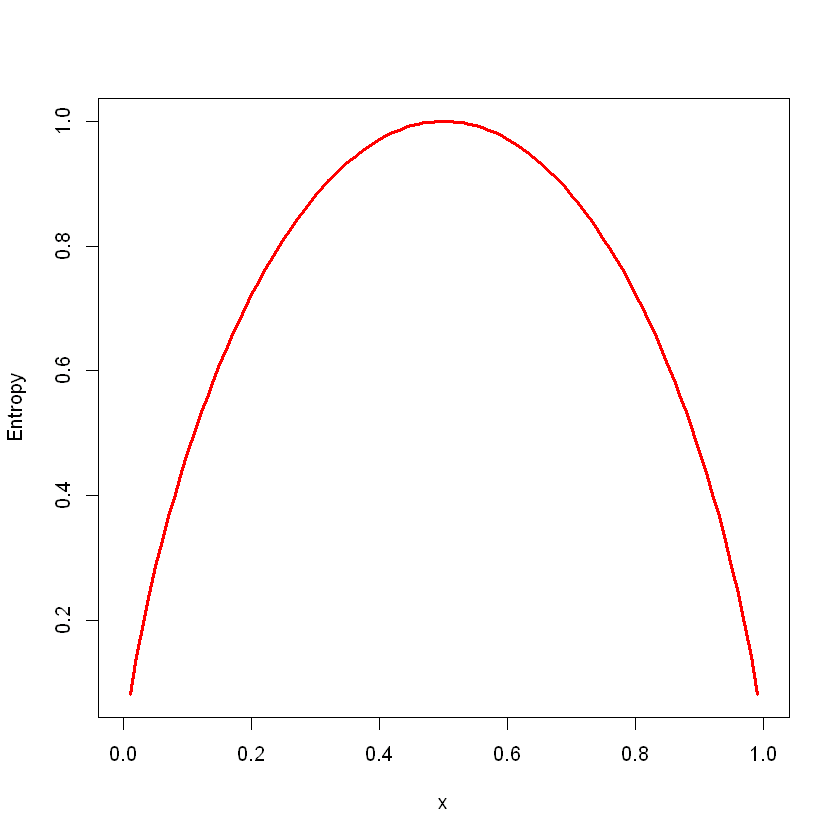

In [2]:
curve(-x * log2(x) - (1 - x) * log2(1 - x), col="red", xlab = "x", ylab = "Entropy", lwd=3) 

 As one class increasingly dominates the other, the entropy reduces to zero. 

#### Choosing the best split

Information Gain: is a calculated as the difference between the entropy in the segment before the split (S1), and the partitions resulting from the split (S2). Other commonly used criteria are Gini index, Chi-Squared statistic, and gain ratio. 

### Step One: Collect the Data

In [3]:
credit <- read.csv("../csv/credit.csv", stringsAsFactors = FALSE)

In [4]:
str(credit)

'data.frame':	1000 obs. of  21 variables:
 $ checking_balance    : chr  "< 0 DM" "1 - 200 DM" "unknown" "< 0 DM" ...
 $ months_loan_duration: int  6 48 12 42 24 36 24 36 12 30 ...
 $ credit_history      : chr  "critical" "repaid" "critical" "repaid" ...
 $ purpose             : chr  "radio/tv" "radio/tv" "education" "furniture" ...
 $ amount              : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings_balance     : chr  "unknown" "< 100 DM" "< 100 DM" "< 100 DM" ...
 $ employment_length   : chr  "> 7 yrs" "1 - 4 yrs" "4 - 7 yrs" "4 - 7 yrs" ...
 $ installment_rate    : int  4 2 2 2 3 2 3 2 2 4 ...
 $ personal_status     : chr  "single male" "female" "single male" "single male" ...
 $ other_debtors       : chr  "none" "none" "none" "guarantor" ...
 $ residence_history   : int  4 2 3 4 4 4 4 2 4 2 ...
 $ property            : chr  "real estate" "real estate" "real estate" "building society savings" ...
 $ age                 : int  67 22 49 45 53 35 53 35 61 28 ..

### Step Two: Explore and Prepare the Data

Let's check a couple features that seems likely to help predict a bank loan default - checking_balance and savings_balance

In [5]:
table(credit$checking_balance)
table(credit$savings_balance)


    < 0 DM   > 200 DM 1 - 200 DM    unknown 
       274         63        269        394 


     < 100 DM     > 1000 DM  101 - 500 DM 501 - 1000 DM       unknown 
          603            48           103            63           183 

The above data was obtained by Germany so the currency is recorded in Deutsche Marks (DM)

In [6]:
summary(credit$months_loan_duration)
summary(credit$amount)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    4.0    12.0    18.0    20.9    24.0    72.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    250    1366    2320    3271    3972   18420 

In [7]:
credit$default <- factor(credit$default, levels = c(1,2), labels = c("No", "Yes"))

In [8]:
table(credit$default)


 No Yes 
700 300 

#### Create random training and test datasets

Let's split the dataset into two partitions - 90% for training and 10% for testing

In [9]:
set.seed(12345)

In [10]:
credit_random <- credit[order(runif(1000)), ]

In [11]:
summary(credit$amount)
summary(credit_random$amount)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    250    1366    2320    3271    3972   18420 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    250    1366    2320    3271    3972   18420 

In [12]:
head(credit$amount)
head(credit_random$amount)

[1] 1169 5951 2096 7882 4870 9055

[1] 1199 2576 1103 4020 1501 1568

In [13]:
credit_train <- credit_random[1:900, ]
credit_test <- credit_random[901:1000, ]

Let's check to make sure the number of default loans are equal in each dataset

In [14]:
prop.table(table(credit_train$default))
prop.table(table(credit_test$default))


       No       Yes 
0.7022222 0.2977778 


  No  Yes 
0.68 0.32 

### Step Three: Train Model on Data

In [15]:
install.packages("C50", repo = "https://cran.r-project.org/")

also installing the dependency 'partykit'



package 'partykit' successfully unpacked and MD5 sums checked
package 'C50' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Bradley Bailey\AppData\Local\Temp\Rtmpc7mTm5\downloaded_packages


In [16]:
library(C50)

Warning message:
: package 'C50' was built under R version 3.2.5

In [17]:
credit_model <- C5.0(credit_train[-21], credit_train$default)

In [18]:
credit_model


Call:
C5.0.default(x = credit_train[-21], y = credit_train$default)

Classification Tree
Number of samples: 900 
Number of predictors: 20 

Tree size: 57 

Non-standard options: attempt to group attributes


In [19]:
summary(credit_model)


Call:
C5.0.default(x = credit_train[-21], y = credit_train$default)


C5.0 [Release 2.07 GPL Edition]  	Wed Jun 29 11:49:49 2016
-------------------------------

Class specified by attribute `outcome'

Read 900 cases (21 attributes) from undefined.data

Decision tree:

checking_balance = unknown: No (358/44)
checking_balance in {< 0 DM,1 - 200 DM,> 200 DM}:
:...foreign_worker = no:
    :...installment_plan in {none,stores}: No (17/1)
    :   installment_plan = bank:
    :   :...residence_history <= 3: Yes (2)
    :       residence_history > 3: No (2)
    foreign_worker = yes:
    :...credit_history in {fully repaid,
        :                  fully repaid this bank}: Yes (61/20)
        credit_history in {critical,repaid,delayed}:
        :...months_loan_duration <= 11: No (76/13)
            months_loan_duration > 11:
            :...savings_balance = > 1000 DM: No (13)
                savings_balance in {< 100 DM,101 - 500 DM,501 - 1000 DM,
                :                   unknow

In [20]:
credit_predict <- predict(credit_model, credit_test)

In [21]:
library(gmodels)

Warning message:
: package 'gmodels' was built under R version 3.2.5

In [22]:
CrossTable(x = credit_test$default, y = credit_predict, prop.chisq = FALSE,
          prop.c = FALSE, prop.r = FALSE, dnn = c('actual default', 'predicted default'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
               | predicted default 
actual default |        No |       Yes | Row Total | 
---------------|-----------|-----------|-----------|
            No |        54 |        14 |        68 | 
               |     0.540 |     0.140 |           | 
---------------|-----------|-----------|-----------|
           Yes |        11 |        21 |        32 | 
               |     0.110 |     0.210 |           | 
---------------|-----------|-----------|-----------|
  Column Total |        65 |        35 |       100 | 
---------------|-----------|-----------|-----------|

 


### Step Five: Improving Model Performance

In [23]:
credit_boost10 <- C5.0(credit_train[-21], credit_train$default, trials = 10)

In [24]:
credit_boost10


Call:
C5.0.default(x = credit_train[-21], y = credit_train$default, trials = 10)

Classification Tree
Number of samples: 900 
Number of predictors: 20 

Number of boosting iterations: 10 
Average tree size: 47.3 

Non-standard options: attempt to group attributes


In [25]:
summary(credit_boost10)


Call:
C5.0.default(x = credit_train[-21], y = credit_train$default, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Wed Jun 29 12:07:45 2016
-------------------------------

Class specified by attribute `outcome'

Read 900 cases (21 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

checking_balance = unknown: No (358/44)
checking_balance in {< 0 DM,1 - 200 DM,> 200 DM}:
:...foreign_worker = no:
    :...installment_plan in {none,stores}: No (17/1)
    :   installment_plan = bank:
    :   :...residence_history <= 3: Yes (2)
    :       residence_history > 3: No (2)
    foreign_worker = yes:
    :...credit_history in {fully repaid,
        :                  fully repaid this bank}: Yes (61/20)
        credit_history in {critical,repaid,delayed}:
        :...months_loan_duration <= 11: No (76/13)
            months_loan_duration > 11:
            :...savings_balance = > 1000 DM: No (13)
                savings_balance in {< 100 DM,101 - 500 DM,501 - 1000 DM,
     

In [26]:
credit_boost10_pred10 <- predict(credit_boost10, credit_test)

In [27]:
CrossTable(x = credit_test$default, y = credit_boost10_pred10, prop.chisq = FALSE,
          prop.c = FALSE, prop.r = FALSE, dnn = c('actual default', 'predicted default'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
               | predicted default 
actual default |        No |       Yes | Row Total | 
---------------|-----------|-----------|-----------|
            No |        63 |         5 |        68 | 
               |     0.630 |     0.050 |           | 
---------------|-----------|-----------|-----------|
           Yes |        16 |        16 |        32 | 
               |     0.160 |     0.160 |           | 
---------------|-----------|-----------|-----------|
  Column Total |        79 |        21 |       100 | 
---------------|-----------|-----------|-----------|

 


In [28]:
 error_cost <- matrix(c(0, 1, 4, 0), nrow = 2)

In [29]:
error_cost

0,4
1,0


In [30]:
credit_cost <- C5.0(credit_train[-21], credit_train$default, costs = error_cost)

Warning message:
In C5.0.default(credit_train[-21], credit_train$default, costs = error_cost): 
no dimnames were given for the cost matrix; the factor levels will be used


In [31]:
 credit_cost_pred <- predict(credit_cost, credit_test) 

In [32]:
CrossTable(credit_test$default, credit_cost_pred, 
           prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE, 
           dnn = c('actual default', 'predicted default')) 


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
               | predicted default 
actual default |        No |       Yes | Row Total | 
---------------|-----------|-----------|-----------|
            No |        38 |        30 |        68 | 
               |     0.380 |     0.300 |           | 
---------------|-----------|-----------|-----------|
           Yes |         5 |        27 |        32 | 
               |     0.050 |     0.270 |           | 
---------------|-----------|-----------|-----------|
  Column Total |        43 |        57 |       100 | 
---------------|-----------|-----------|-----------|

 


# Classification Rule-learners

## 1R
### *Strengths*
**1)** Generates a single, easy-to-understand, human-readable rule-of-thumb **2)** Often performs surprisingly well **3)** Can serve as a benchmark for more complex algorithms
### *Weaknesses*
**1)** Uses only a single feature **2)** Probably overly simplistic

1R will return the one rule that resulted in the fewest errors for a single feature. Good rule-of-thumb but often over-simplistic.

## RIPPER
*(Repeated Incremental Pruning to Produce Error Reduction)*
### *Strengths*
**1)** Generates easy-to-understand, human-readable rules **2)** Efficient on large and noisy datasets **3)** Generally produces a simpler model than a comparable  decision tree 
### *Weaknesses*
**1)** May result in rules that seem to defy common sense or expert knowledge **2)** Not ideal for working with numeric data **3)** Might not perform as well as more complex models


### Step One: Collect the data

In [33]:
mush <- read.csv("../csv/mushrooms.csv", stringsAsFactors=TRUE)

### Step Two: Explore and Prepare the Data

In [34]:
str(mush)

'data.frame':	8124 obs. of  23 variables:
 $ type                    : Factor w/ 2 levels "e","p": 2 1 1 2 1 1 1 1 2 1 ...
 $ cap_shape               : Factor w/ 6 levels "b","c","f","k",..: 6 6 1 6 6 6 1 1 6 1 ...
 $ cap_surface             : Factor w/ 4 levels "f","g","s","y": 3 3 3 4 3 4 3 4 4 3 ...
 $ cap_color               : Factor w/ 10 levels "b","c","e","g",..: 5 10 9 9 4 10 9 9 9 10 ...
 $ bruises                 : Factor w/ 2 levels "f","t": 2 2 2 2 1 2 2 2 2 2 ...
 $ odor                    : Factor w/ 9 levels "a","c","f","l",..: 7 1 4 7 6 1 1 4 7 1 ...
 $ gill_attachment         : Factor w/ 2 levels "a","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill_spacing            : Factor w/ 2 levels "c","w": 1 1 1 1 2 1 1 1 1 1 ...
 $ gill_size               : Factor w/ 2 levels "b","n": 2 1 1 2 1 1 1 1 2 1 ...
 $ gill_color              : Factor w/ 12 levels "b","e","g","h",..: 5 5 6 6 5 6 3 6 8 3 ...
 $ stalk_shape             : Factor w/ 2 levels "e","t": 1 1 1 1 2 1 1 1 1 1 ...
 $ stalk_r

Notice that veil_type is a factor with only one factor. This isn't going to provide us with any extra information so let's drop it. 

In [35]:
mush$veil_type <- NULL

In [36]:
mush$type <- factor(mush$type, levels = c("e", "p"), labels = c("edible", "poisonous"))

In [37]:
table(mush$type)


   edible poisonous 
     4208      3916 

### Step Three: Training the Model on Data

In [38]:
library(RWeka)

Warning message:
: package 'RWeka' was built under R version 3.2.5

First, let's use the OneR algorithm on our dataset.

In [39]:
mush_1R <- OneR(type ~ ., data = mush)
mush_1R

odor:
	a	-> edible
	c	-> poisonous
	f	-> poisonous
	l	-> edible
	m	-> poisonous
	n	-> edible
	p	-> poisonous
	s	-> poisonous
	y	-> poisonous
(8004/8124 instances correct)


Rule learned: if it smells bad, don't eat it. 

### Step Four: Evaluating Model Performance

In [40]:
summary(mush_1R)


=== Summary ===

Correctly Classified Instances        8004               98.5229 %
Incorrectly Classified Instances       120                1.4771 %
Kappa statistic                          0.9704
Mean absolute error                      0.0148
Root mean squared error                  0.1215
Relative absolute error                  2.958  %
Root relative squared error             24.323  %
Total Number of Instances             8124     

=== Confusion Matrix ===

    a    b   <-- classified as
 4208    0 |    a = edible
  120 3796 |    b = poisonous

### Step Five: Improving Model Performance

Next, we are going to use JRip(), an implementation of the RIPPER algorithm also found in the RWeka library

In [78]:
mush_jrip <- JRip(type ~ ., data = mush)
mush_jrip

JRIP rules:

(odor = f) => type=poisonous (2160.0/0.0)
(gill_size = n) and (gill_color = b) => type=poisonous (1152.0/0.0)
(gill_size = n) and (odor = p) => type=poisonous (256.0/0.0)
(odor = c) => type=poisonous (192.0/0.0)
(spore_print_color = r) => type=poisonous (72.0/0.0)
(stalk_surface_below_ring = y) and (stalk_surface_above_ring = k) => type=poisonous (68.0/0.0)
(habitat = l) and (cap_color = w) => type=poisonous (8.0/0.0)
(stalk_color_above_ring = y) => type=poisonous (8.0/0.0)
 => type=edible (4208.0/0.0)

Number of Rules : 9


In [79]:
table(mush$type)


   edible poisonous 
     4208      3916 